In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
#tk = th.Thicket.from_caliperreader(glob("t128-v65536-i1.cali"))
#tk = th.Thicket.from_caliperreader(glob("p2-a1048576-i1.cali"))
tk = th.Thicket.from_caliperreader(glob("*-i4.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel"], axis=1)#,"Avg time/rank", "Min time/rank", "Max time/rank", "Total time", "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              333888426        4.258127   
                                                  414498271        0.562434   
                                                  675422748        0.606733   
                                                  759761496       17.161111   
                                                  1854694556      68.065037   
                                                  2117249302     300.747739   
                                                  2566690557       1.220337   
                                                  2596015767      16.903870   
                                                  3011088583      67.698188   
                                                  3144157472       1.544917   
                                                  3551453612     297.045021   
                                                  3613854097       0.601524   
                                                  3869713418       0.395989   
                                                  3957604448       3.970717   
{'name': 'comm', 'type': 'function'}              333888426        0.008336   
                                                  414498271        0.000871   
                                                  675422748        0.001413   
                                                  759761496        0.030776   
                                                  1854694556       0.110722   
                                                  2117249302       0.492622   
                                                  2566690557       0.002904   
                                                  2596015767       0.030796   
                                                  3011088583       0.125347   
                                                  3144157472       0.003430   
                                                  3551453612       0.476889   
                                                  3613854097       0.001425   
                                                  3869713418       0.000904   
                                                  3957604448       0.008904   
{'name': 'comm_large', 'type': 'function'}        333888426        0.008084   
                                                  414498271        0.000663   
                                                  675422748        0.001169   
                                                  759761496        0.030448   
                                                  1854694556       0.110413   
                                                  2117249302       0.492229   
                                                  2566690557       0.002616   
                                                  2596015767       0.030511   
                                                  3011088583       0.125012   
                                                  3144157472       0.003144   
                                                  3551453612       0.476557   
                                                  3613854097       0.001179   
                                                  3869713418       0.000685   
                                                  3957604448       0.008613   
{'name': 'cudaMemcpy', 'type': 'function'}        333888426        0.007842   
                                                  414498271        0.000461   
                                                  675422748        0.000930   
                                                  759761496        0.030127   
                                                  1854694556       0.110122   
                                                  2117249302       0.491848   
                                                  2566690557       0.002329   
                                 

In [3]:
tk.metadata
#available_metrics = tk.statsframe.show_metric_columns()
#print("Available metric columns:", available_metrics)

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
333888426,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v4194304-i4.cali,1700189384,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 64, 4194304, 4]",g,RadixSort,CUDA,int,4,4194304,1%perturbed,64,65536,10,Online,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy
414498271,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v65536-i4.cali,1700187490,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 64, 65536, 4]",g,RadixSort,CUDA,int,4,65536,1%perturbed,64,1024,10,Online,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy
675422748,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v262144-i4.cali,1700188953,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 128, 262144, 4]",g,RadixSort,CUDA,int,4,262144,1%perturbed,128,2048,10,Online,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy
759761496,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v16777216-i4.cali,1700189490,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 64, 16777216, 4]",g,RadixSort,CUDA,int,4,16777216,1%perturbed,64,262144,10,Online,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy
1854694556,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v67108864-i4.cali,1700189687,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 64, 67108864, 4]",g,RadixSort,CUDA,int,4,67108864,1%perturbed,64,1048576,10,Online,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy
2117249302,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v268435456-i4.cali,1700189748,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 64, 268435456, 4]",g,RadixSort,CUDA,int,4,268435456,1%perturbed,64,4194304,10,Online,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy
2566690557,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v1048576-i4.cali,1700189210,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 128, 1048576, 4]",g,RadixSort,CUDA,int,4,1048576,1%perturbed,128,8192,10,Online,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy
2596015767,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v16777216-i4.cali,1700189490,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 128, 16777216, 4]",g,RadixSort,CUDA,int,4,16777216,1%perturbed,128,131072,10,Online,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy
3011088583,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v67108864-i4.cali,1700189710,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix, 128, 67108864, 4]",g,RadixSort,CUDA,int,4,67108864,1%perturbed,128,524288,10,Online,data_init,comm,comp,comm_large,comp_large,correctness_check,cudaMemcpy


In [4]:
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata.columns

Index(['cali.caliper.version', 'spot.metrics', 'spot.timeseries.metrics',
       'spot.format.version', 'spot.options', 'spot.channels', 'cali.channel',
       'spot:cuda.gputime', 'spot:node.order', 'spot:output', 'launchdate',
       'libraries', 'cmdline', 'cluster', 'Algorithm', 'ProgrammingModel',
       'Datatype', 'SizeOfDatatype', 'InputSize', 'InputType', 'num_threads',
       'num_blocks', 'group_num', 'implementation_source', 'data_init', 'comm',
       'comp', 'comm_large', 'comp_large', 'correctness_check', 'cudaMemcpy'],
      dtype='object')

In [6]:
gb = tk.groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b4b666c6820>, 262144: <thicket.thicket.Thicket object at 0x2b4b66650070>, 1048576: <thicket.thicket.Thicket object at 0x2b4b66541fd0>, 4194304: <thicket.thicket.Thicket object at 0x2b4b666072b0>, 16777216: <thicket.thicket.Thicket object at 0x2b4b665c9160>, 67108864: <thicket.thicket.Thicket object at 0x2b4b665c1d00>, 268435456: <thicket.thicket.Thicket object at 0x2b4b666b3d00>}


In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [8]:
ctk.dataframe

65536  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.562434   
                                                  128              0.395989   
{'name': 'comm', 'type': 'function'}              64               0.000871   
                                                  128              0.000904   
{'name': 'comm_large', 'type': 'function'}        64               0.000663   
                                                  128              0.000685   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.000461   
                                                  128              0.000473   
{'name': 'comp', 'type': 'function'}              64               0.490961   
                                                  128              0.338099   
{'name': 'comp_large', 'type': 'function'}        64               0.490614   
                                                  128              0.337742   
{'name': 'correctness_check', 'type': 'function'} 64               0.000195   
                                                  128              0.000193   
{'name': 'data_init', 'type': 'function'}         64               0.000303   
                                                  128              0.000288   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.562434   
                                                  128              0.395989   
{'name': 'comm', 'type': 'function'}              64               0.000871   
                                                  128              0.000904   
{'name': 'comm_large', 'type': 'function'}        64               0.000663   
                                                  128              0.000685   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.000461   
                                                  128              0.000473   
{'name': 'comp', 'type': 'function'}              64               0.490961   
                                                  128              0.338099   
{'name': 'comp_large', 'type': 'function'}        64               0.490614   
                                                  128              0.337742   
{'name': 'correctness_check', 'type': 'function'} 64               0.000195   
                                                  128              0.000193   
{'name': 'data_init', 'type': 'function'}         64               0.000303   
                                                  128              0.000288   

                                                                             \
                                                              Avg time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.562434   
                                                  128              0.395989   
{'name': 'comm', 'type': 'function'}              64               0.000871   
                                                  128              0.000904   
{'name': 'comm_large', 'type': 'function'}        64               0.000663   
                                                  128              0.000685   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.000461   
                                                  128              0.000473   
{'name': 'comp', 'type': 'function'}              64               0.490961   
                                                  128              0.338099   
{'name': 'comp_large', 'type': 'functio

In [9]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# Drop "time" label as it is redundant
#ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

<ipython-input-9-0b20ecda1570>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)


In [10]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
input_sizes = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))

In [11]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
   # plt.yscale("log", base=10)
   # plt.xscale("log", base=2)
    plt.xticks(num_threads)
    plt.show()
    return fig, ax

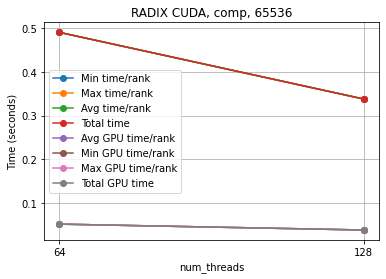

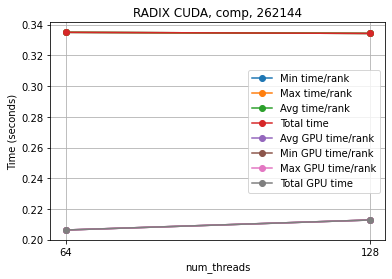

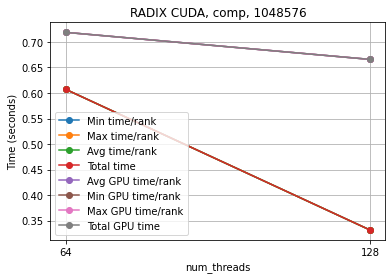

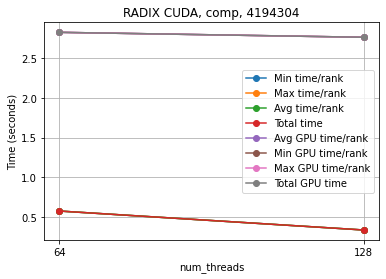

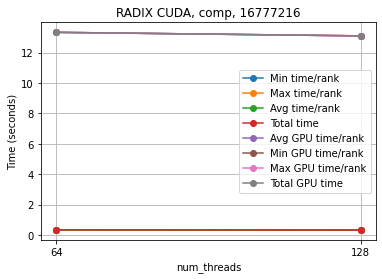

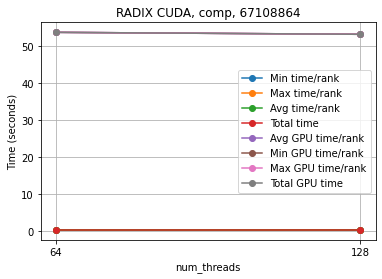

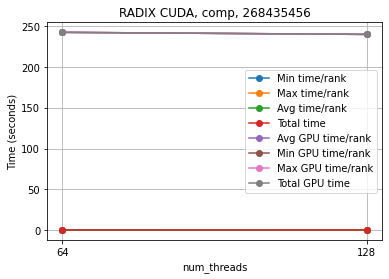

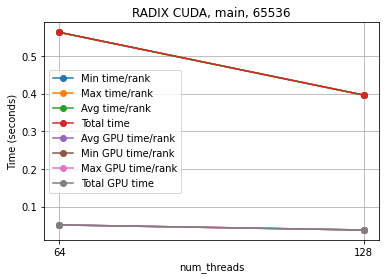

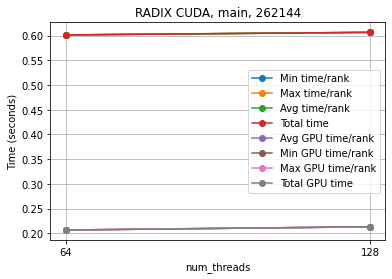

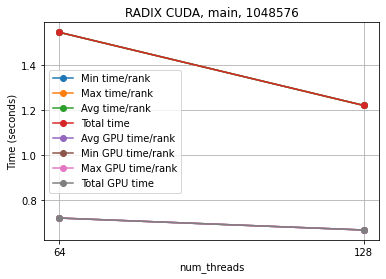

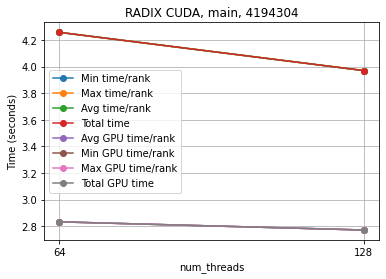

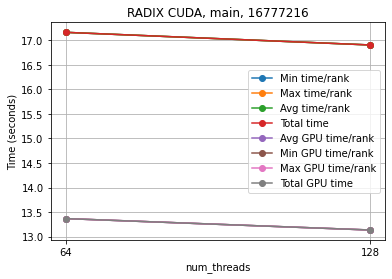

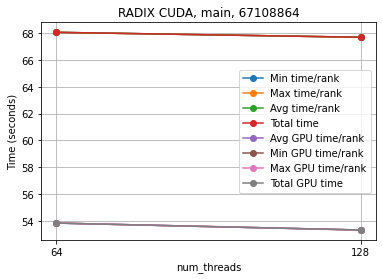

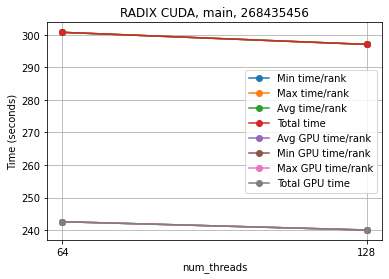

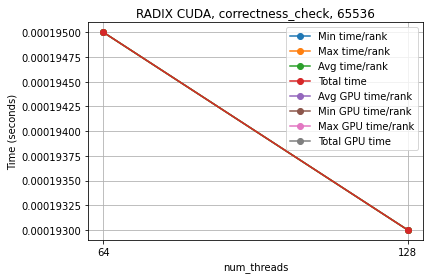

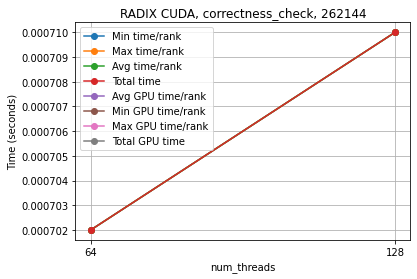

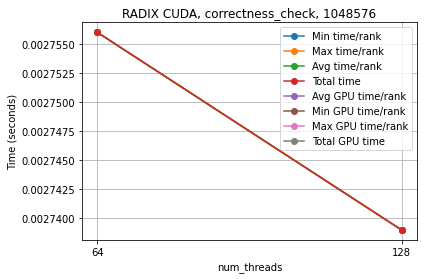

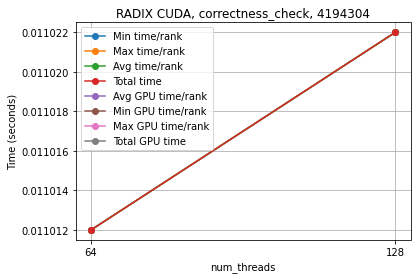

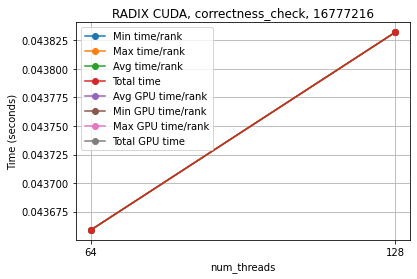

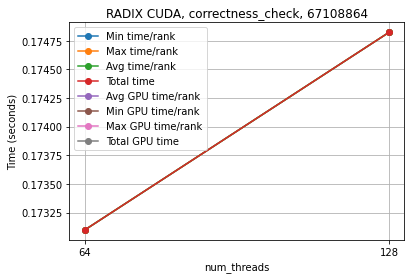

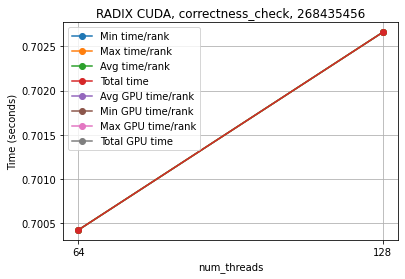

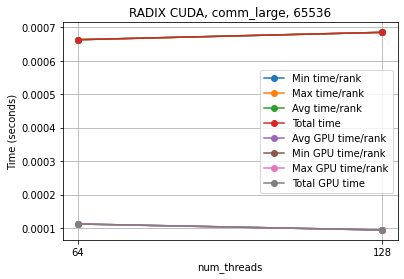

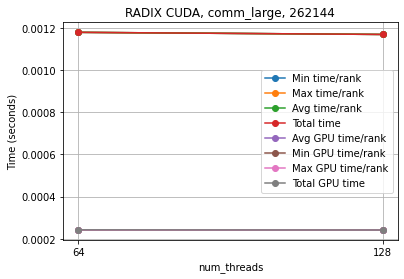

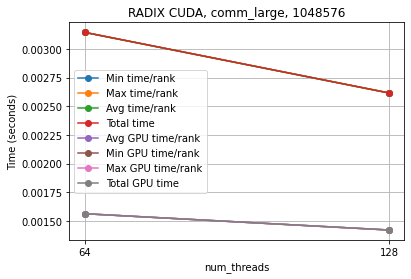

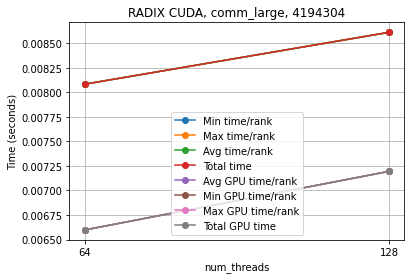

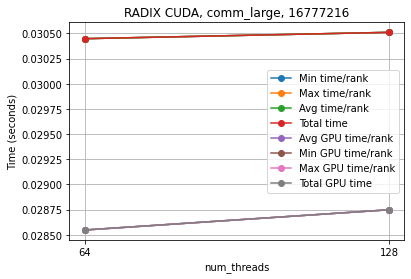

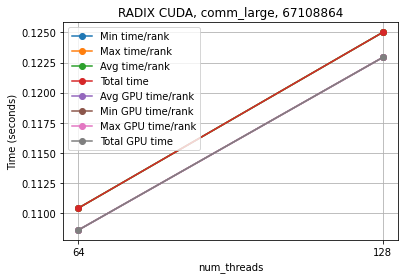

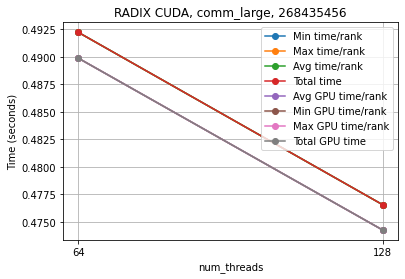

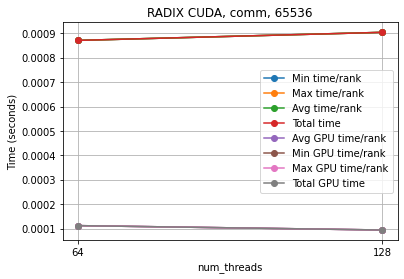

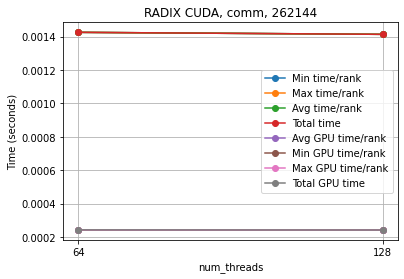

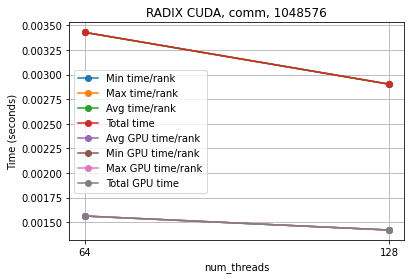

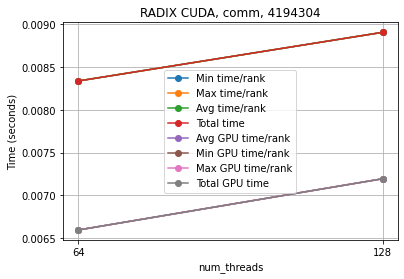

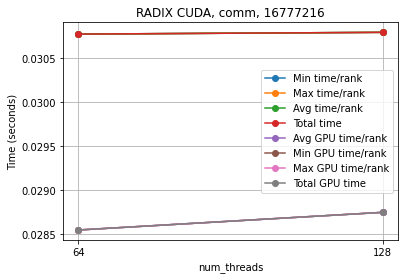

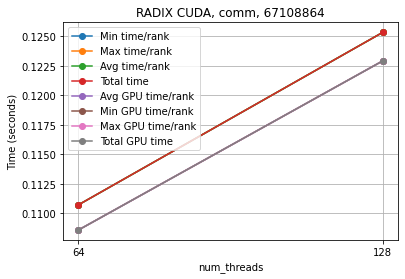

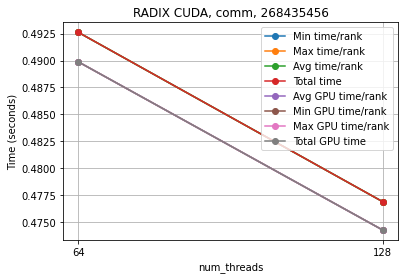

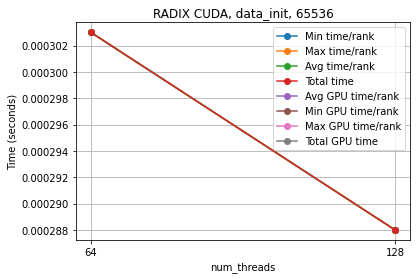

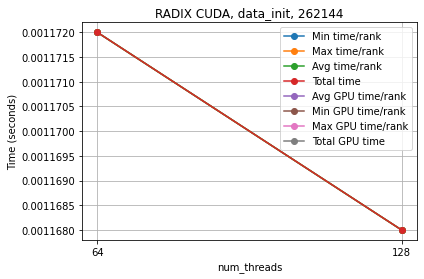

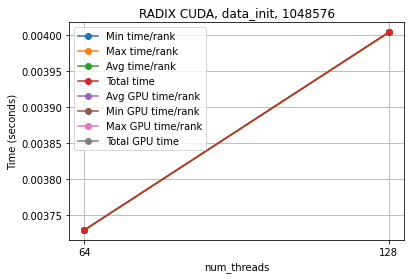

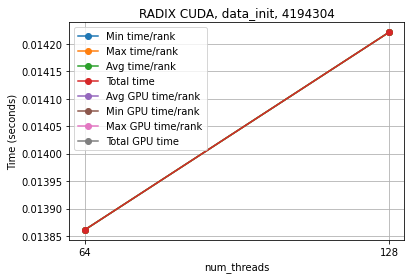

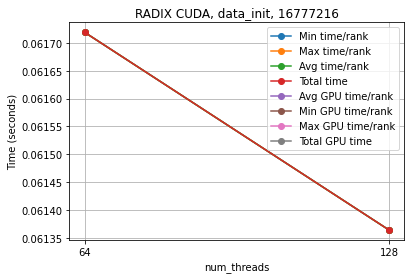

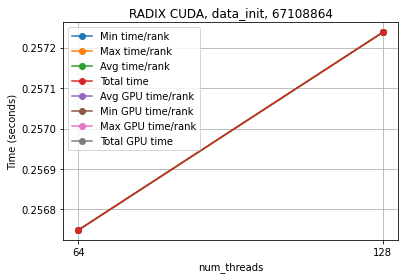

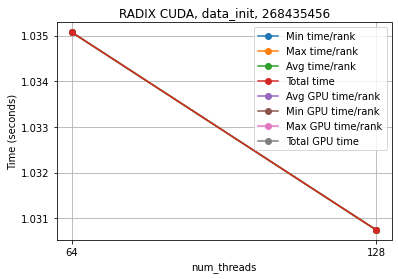

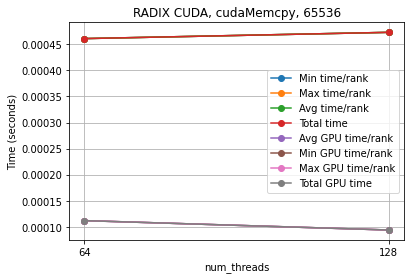

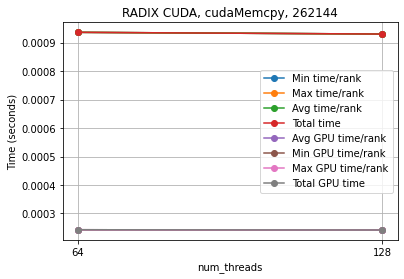

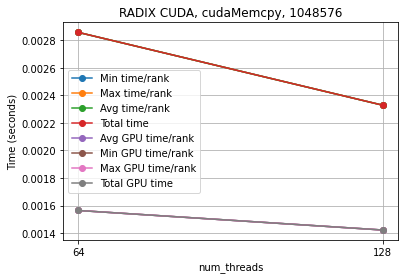

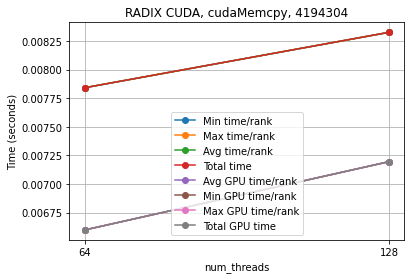

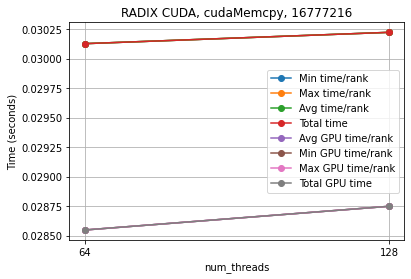

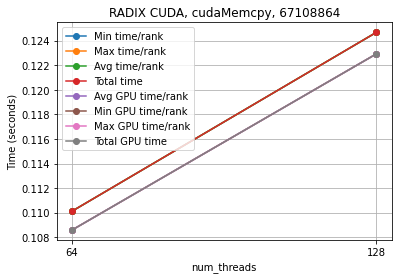

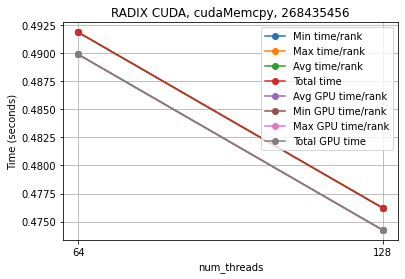

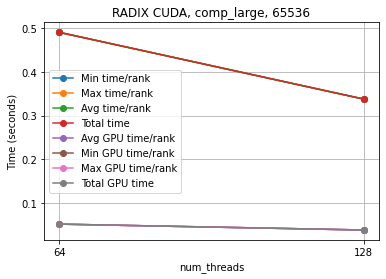

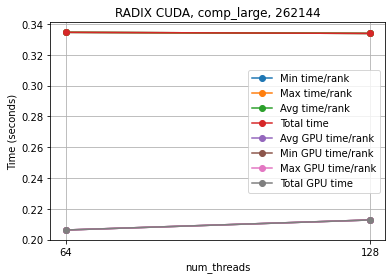

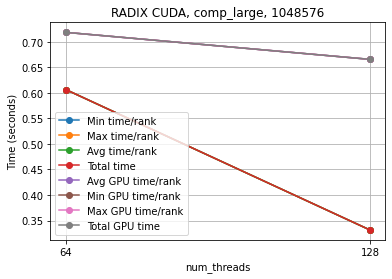

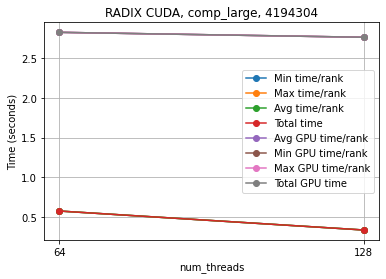

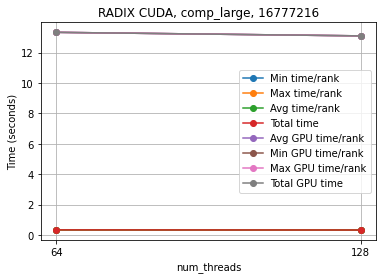

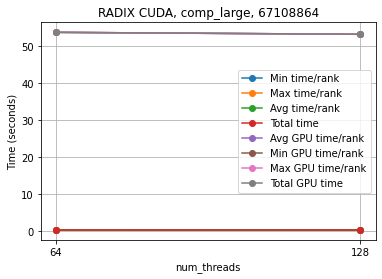

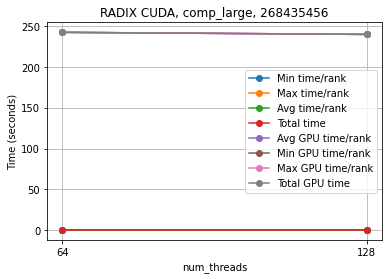

In [12]:
for name in function_names:
     for size in input_sizes:
        plot_mpl(
            df=ctk.dataframe.loc[name,size],
            title=f"RADIX CUDA, {name}, {size}", 
            xlabel="num_threads",
            ylabel="Time (seconds)",
        )